In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils import plot_chr_in_splits, get_labels, load_annotations, plot_seq_overlap
import os
import numpy as np

TASK = 'histone_modification'
LABEL_DEPTH = 18

In [3]:
annotations = load_annotations(TASK)
annotations

,chromosome,start,end,score,-,strand,label,split
0,13,18172516,18173028,.,1,+,7,train
1,13,18189858,18190370,.,1,+,6,train
2,13,18191521,18192033,.,1,+,6,train
3,13,18212875,18213387,.,1,+,"2,7",train
4,13,18213362,18213874,.,1,+,2,train
...,...,...,...,...,...,...,...,...
625224,17,83199009,83199521,.,1,+,5,train
625225,17,83199485,83199997,.,1,+,9,train
625226,17,83200265,83200777,.,1,+,"1,5",train
625227,17,83204011,83204523,.,1,+,2,train


In [4]:
annotations['split'].value_counts()/len(annotations)*100

split
train    69.392335
test     19.283654
valid    11.324011
Name: count, dtype: float64

In [5]:
annotations['length'] = annotations['end'] - annotations['start']
annotations['length'].describe()

count    625229.0
mean        512.0
std           0.0
min         512.0
25%         512.0
50%         512.0
75%         512.0
max         512.0
Name: length, dtype: float64

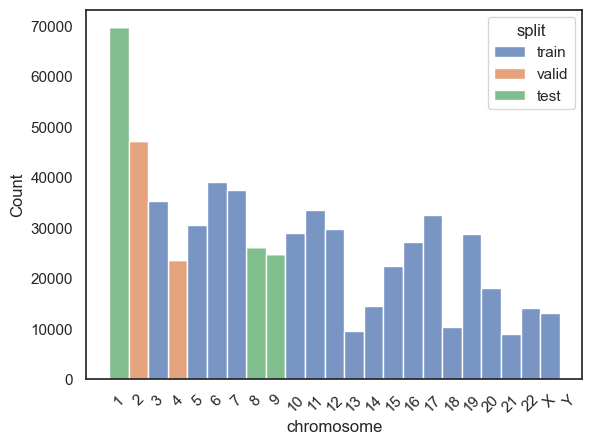

In [6]:
plot_chr_in_splits(annotations)

Number of annotations with overlaps: 73892.0
Total number of samples: 433861
Percentage of annotations with overlaps: 17.03%


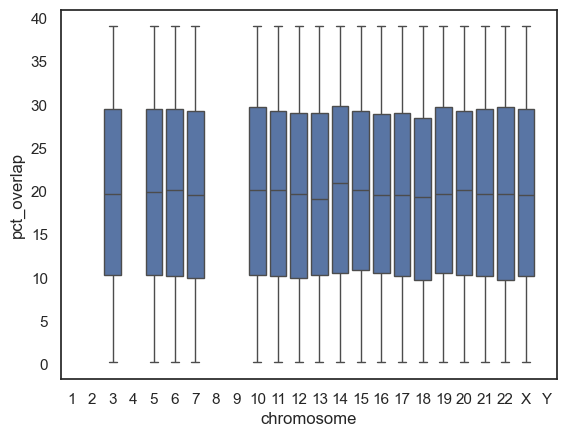

In [7]:
train_annotations = annotations[annotations['split'] == 'train'].copy()
overlap = plot_seq_overlap(train_annotations)

In [8]:
overlap.describe()

,length,overlap,pct_overlap
count,73892.0,73892.000000,73892.000000
mean,512.0,101.224409,19.770392
std,0.0,57.072043,11.146883
min,512.0,1.000000,0.195312
25%,512.0,52.750000,10.302734
50%,512.0,102.000000,19.921875
75%,512.0,151.000000,29.492188
max,512.0,200.000000,39.062500


### Labels

In [7]:
labels_df, total_labels = get_labels(annotations, LABEL_DEPTH)
total_labels

label_0      41506
label_1      93261
label_2      25295
label_3      98678
label_4      35382
label_5      92587
label_6      71400
label_7      69975
label_8      38312
label_9     133535
label_10     21717
label_11     19706
label_12     29394
label_13     40934
label_14     67714
label_15     59069
label_16     42993
label_17    107810
dtype: int64

In [10]:
total_labels/total_labels.sum() * 100

label_0      3.810449
label_1      8.561805
label_2      2.322202
label_3      9.059111
label_4      3.248236
label_5      8.499928
label_6      6.554861
label_7      6.424039
label_8      3.517224
label_9     12.259150
label_10     1.993724
label_11     1.809105
label_12     2.698509
label_13     3.757937
label_14     6.216468
label_15     5.422816
label_16     3.946963
label_17     9.897472
dtype: float64